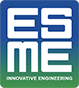 
<div class="alert alert-block alert-info" style="margin-top: 10px; padding: 10px; background: linear-gradient(to right, #f7f9fa, #d9edfb);">
    <h1 style="margin-left: 85px">Advance algorithmics 1 - Course 04 - Sorting algorithm 2</h1>
</div>

<div style='color: rgb(49, 112, 143)'>
    <h3>Contents</h3>
</div>

* <a href="#Tri-par-fusion">Merge sort</a>
    * <a href="#D%C3%A9finition">Definition</a>
    * <a href="#Impl%C3%A9mentation">Implementation</a>
    * <a href="#Complexit%C3%A9">Complexity</a>
* <a href="#Tri-rapide">Quick sort</a>
    * <a href="#Introduction">Introduction</a>
    * <a href="#Impl%C3%A9mentation">Implementation</a>
    * <a href="#Complexit%C3%A9">Complexity</a>
    * <a href="#Conclusion">Conclusion</a>

<div class="alert alert-block alert-info" style='color:white; background-color:blue; border-color: blue; '>
    <h2>Merge sort</h2>
</div>

<div style='color: forestgreen'>
    <h3>Definition</h3>
</div>

In french: *Tri fusion*

This sorting algorithm was invented by John von Neumann in 1945. It uses the principle of *"divide and conquer"*.

The algorithm is simply described recursively:

- If the list has 0 or 1 element, it is already sorted.
- If the list has more than one element, it is split into two lists and merge sort is applied to each of the two lists.
- The results are then merged.

To merge two sorted lists, compare the elements of each list and move the smallest one into a new list. When one of the lists is empty, move the remaining elements from the second list.

Example:

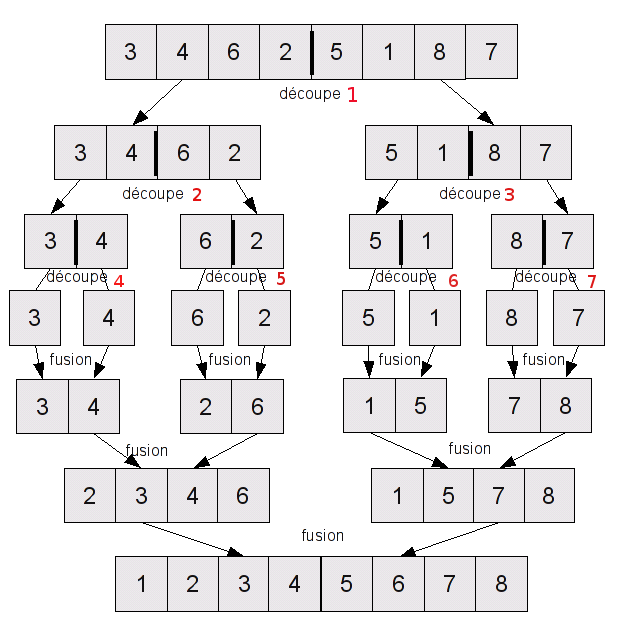

<div style='color: forestgreen'>
    <h3>Implementation</h3>
</div>

We have chosen to handle the merge iteratively, filling an initially empty list `list_merged` with the elements from the two lists `list1` and `list2`.

In [10]:
def merge(list1, list2):
    list_merged = []
    i, j = 0, 0
    while i < len(list1) and j < len(list2):
        if list1[i] < list2[j]:
            list_merged.append(list1[i])
            i += 1
        else:
            list_merged.append(list2[j])
            j += 1
    while i<len(list1):
        list_merged.append(list1[i])
        i+=1
    while j<len(list2):
        list_merged.append(list2[j])
        j+=1
    return list_merged
            

We still need to write the code for the `merge_sort` function: if $n≥2$, we set $L1=L[0:p]$ (the sublist from index $0$ to $p−1$) and $L2=L[p:]$ (the sublist from index $p$ to the last index).

<div style="border-color: rgba(40, 167, 70, 0.294); margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid; border-left: .2rem solid rgba(40, 167, 70, 0.294); border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: rgba(40,167,70,0.1); position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">💡 Information</p>
<p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">
Slicing in Python is a feature that allows you to extract a subsequence from a sequence (for example, a sublist from a list). This can be very useful for accessing specific parts of a sequence. Slicing uses three parameters:    
   <code style="margin: 0 1.4rem;">sequence[start:end:step]</code>

- The first parameter is the start index, which is **included** in the subsequence.
- The second parameter is the end index, which is **excluded** from the subsequence.
- The third parameter, step, is optional. It indicates the frequency at which elements should be extracted from the sequence.
</p>
</div>

In [13]:
def merge_sort(input_list):
    if len(input_list)<2:
        return input_list[:]
    else:
        midle=len(input_list)//2
        list1=merge_sort(input_list[:midle])
        list2=merge_sort(input_list[midle:])
        return merge(list1, list2)

L=[3,4,6,2,5,1,8,7]
print(merge_sort(L))

[1, 2, 3, 4, 5, 6, 7, 8]


<div style='color: forestgreen'>
    <h3>Complexity</h3>
</div>

The analysis of time complexity is simplified if we assume that the sequence to be sorted of size $n$ is a power of two. Let $k∈N$ such that $n=2^k$.

Let $T(n)$ denote the execution time in the worst-case scenario, and take the comparison of two elements as the unit of cost. Sorting a single element takes constant time. For a sequence of multiple elements, the following sequence of operations must be considered:

- **Divide**: This step only separates the initial list into two sublists and does not perform any comparisons. The complexity is $O(1)$.
- **Conquer**: This step sorts two sublists of size $n/2$. Therefore, the duration is $2T(n/2)$.
- **Merge**: The analysis of the merge algorithm clearly shows that the number of comparisons performed is on the order of $n$.

Thus, the complexity of merge sort can be expressed as:
$$
\begin{array}{rcr}
T(n) & = & O(1) & si & n=1 \\
T(n) & = & 2T(n/2) + cn & si & n>1 
\end{array}
$$

We define the sequence $t(k) = T(2^{k}) = 2 \times T(2^{k-1})+c \times 2^{k} = 2t(k-1)+c\times2^{k}$.

The trick here is to study $u(k) = \frac {t(k)} {2^{k}} = \frac {t(k)} {n}$.

We have $u(k) = \frac {t(k)} {2^{k}} = \frac {2t(k-1) + c \times 2^{k}} {2^{k}} = \frac {t(k-1)} {2^{k-1}} + c = u(k-1) + c$.

The sequence $u(k)$ is an arithmetic sequence whose general term is $u(k) = u(0) + kc$ wich gives $t(k) = (u(0) + kc)  \times  2^{k}$.

Since $k = \log_{2}(n)$, we have 
$$T(n) = nu(0) + cn\log_{2}(n) = O(n\log_{2}(n))$$

The time complexity of this algorithm is $O(n\log n)$ in the best case, in the worst case, and therefore also on average (in the average case).

Rather than studying the sequence mathematically, it is possible to proceed graphically by drawing the tree of recursive calls, considering that $n$ is a power of two.

### 🔁 Recursion tree for merge sort (T(n))

```
                         T(n)
                        /    \
                   T(n/2)   T(n/2)
                   /   \     /   \
              T(n/4) T(n/4) T(n/4) T(n/4)
               / \     / \     / \     / \
            ... ...  ... ...  ... ...  ... ...
               (log₂(n) levels)
```

- At each **level**, $2^k$ calls are made on segments of size $n / 2^k$.
- The total cost per level is always $cn$.
- There are $\log_2(n)$ levels
Thus, the total complexity is **$O(n \log n)$**



<div class="alert alert-block alert-info" style='color:white; background-color:blue; border-color: blue; '>
    <h2>Quick sort</h2>
</div>

<div style='color: forestgreen'>
    <h3>Introduction</h3>
</div>

Quick sort is a highly efficient sorting algorithm based on the same principle as merge sort: it is a _divide and conquer_ algorithm. What differs is the way the initial list is divided. Quick sort works by partitioning the array into two parts around a selected pivot element. It moves smaller elements to the left side of the pivot and larger elements to the right side.

Next, the left and right subparts are sorted recursively to sort the entire array. It is called quick sort because it is about 2 to 3 times faster than common sorting algorithms. Quick sort is widely used for information retrieval and numerical computations within data structures.

- **Divide**: Select an element from the list, for example, the first element (it can be any element depending on the implementation) as the pivot, which we'll call $e$. Remove this pivot from the list and partition the list into two sublists: one containing elements strictly smaller than $e$, and the other containing elements greater than $e$.
- **Conquer**: The two parts of the list are sorted by a recursive call to quick sort. The base case involves a list with only one element, which returns itself (sorted by default);
- **Merge**: Combine the two sublists around the pivot $e$. Since both parts of the list are sorted and the pivot is in the middle, the result will be sorted.

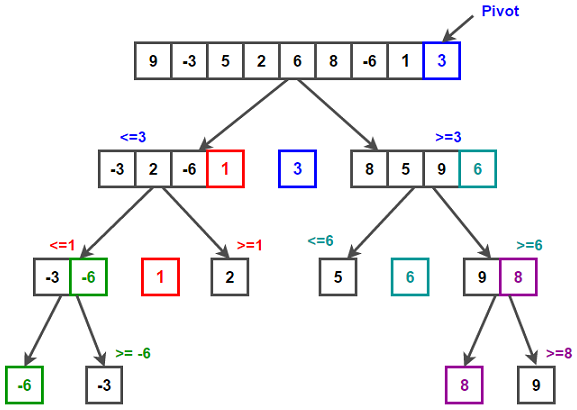

<div style='color: forestgreen'>
    <h3>Implementation</h3>
</div>

In [22]:
def quick_sort(L):
    """Reccursive implementation of quick sort"""
    if len(L) < 2:
        return L
    e = L[0]
    L1, L2 = [], []
    for x in L[1:]:
        if x < e:
            L1.append(x)
        else:
            L2.append(x)
    return quick_sort(L1) + [e] + quick_sort(L2)

L=[3,4,6,2,5,1,8,7]
print(quick_sort(L))

[1, 2, 3, 4, 5, 6, 7, 8]


This function returns a sorted copy of the list passed as an argument, without modifying it.

<div style='color: forestgreen'>
    <h3>Complexity</h3>
</div>

Similarly to the previous analysis, we assume that the size of the sequence to be sorted is $n$, a power of $2$. Let $k\in\mathbb{N}$ such that $n=2^{k}$. Let $T(n)$ denote the execution time in the worst-case scenario, and take the comparison of two elements as the unit of cost.

To solve a problem of size $n$, we solve two problems of size $n/2$ with a linear reconstruction due to the partitioning function, which is linear according to the size of the list. Thus, we have:
$$T(n) = 2T(n/2) + O(n)$$
where $O(n)$ represents the complexity of the partition function.

By iteration, we get:
$$T(n) = 2^{k}T(\frac {n} {2^{k}})+kO(n)$$

Since $n=2^{k}$, we have $k=log_{2}(n)$ and
$$T(n) = nT(1) + log_{2}(n)O(n)$$

Since $T(1)$ as the complexity of quick sort when the array contains a single element (thus sorted), and since this complexity is constant, it follows that:
$$T(n) = O(n\log_{2}(n))$$


<div style='color: cadetblue'>
    <h4> Worst-case scenario for quick sort</h4>
</div>

The reasoning we deployed started from an average case. That is, we assume that the data is organized homogeneously and that when choosing the pivot, the distribution of data between the two sublists L1 and L2 presents several "non-caricature" scenarios. But what if that wasn't necessarily the case?

What happens in the worst possible situation? That is, at each step, we sort a sublist of unit size and a sublist of size $n−1$? In this case, the cost of sorting for this sublist would be $T(n-1)$ because we would have to sort all the elements of the array (except the pivot).

This is typically a case that would occur in a list sorted in reverse order. If the chosen pivot is the first element of the array, we will always have a filled L1 array and an empty L2 array at each turn.

The worst-case complexity is then :
$$
\begin{array}{rcr}
T(n) & = & O(1) & si & n=1 \\
T(n) & = & cn + T(n-1) & si & n>1 
\end{array}
$$

The term $cn$ is related to the cost of partitioning the list. The study of the general term of this sequence allows us to calculate the complexity of this sorting algorithm in the worst case:
$$
T(n) = T(n-1) + c\times(n) \\
T(n-1) = T(n-2) + c\times(n-1) \\
T(n-2) = T(n-3) + c\times(n-2) \\
... \\
T(2) = T(1) + 2c
$$

By summing all these equations, the result obtained is:
$$T(n) = T(1) + \sum_{k=0}^{n-2} c \times (n-k) = T(1) + c\sum_{k=2}^{n}k = T(1) + c\frac {(n-1)(n+2)} {2} = O(n^{2})$$

The complexity obtained in the worst case is quadratic. This result can also be demonstrated using the following recursion tree:
```
                          cn
                         /  \
                  c(n−1)    0
                   /  \
             c(n−2)    0
               /  \
         c(n−3)    0
           /  \
     ...       ...
           /   \
      c(n−k)    0
         / \
       2c  T(1)
```

<div style='color: forestgreen'>
    <h3>Conclusion</h3>
</div>

The quick sort algorithm is certainly one of the most famous and studied algorithms. It was designed in 1961 by British computer scientist Charles Hoare, who is also known for Hoare logic, used in program verification.

Paradoxically, the complexity in the **worst case** for this sort is not linearithmic but **quadratic**. However, unfavorable cases are rare, and its average complexity is linearithmic with a hidden coefficient better than those of other sorting algorithms in the same complexity class. There are now many variations of this algorithm with necessary corrections to ensure the complexity remains linearithmic in the worst case.

***